# Pandas: Series, DataFrame

## Series

In [3]:
import pandas as pd
import numpy as np

In [4]:
series = pd.Series([1, 3, 4, 5, 6, 7])
series

0    1
1    3
2    4
3    5
4    6
5    7
dtype: int64

In [5]:
np_array = np.array([1, 3, 4, 5, 6, 7])
np_array

array([1, 3, 4, 5, 6, 7])

In [6]:
series = pd.Series([1, 3, 4, 5, 6, 7], name="My Super Numbers")
series

0    1
1    3
2    4
3    5
4    6
5    7
Name: My Super Numbers, dtype: int64

In [8]:
print(np_array * 2)
print("\n***\n")
print(series * 2)

[ 2  6  8 10 12 14]

***

0     2
1     6
2     8
3    10
4    12
5    14
Name: My Super Numbers, dtype: int64


In [9]:
print(np_array * np_array)
print("\n***\n")
print(series * series)

[ 1  9 16 25 36 49]

***

0     1
1     9
2    16
3    25
4    36
5    49
Name: My Super Numbers, dtype: int64


In [10]:
series[0], series[2], series[5]

(np.int64(1), np.int64(4), np.int64(7))

In [11]:
series = pd.Series([1, 3, 4, 5, 6, 7], name="My Super Numbers", index=[-1, -2, -3, -4, -5, -200])
series

-1      1
-2      3
-3      4
-4      5
-5      6
-200    7
Name: My Super Numbers, dtype: int64

In [12]:
series[0], series[2], series[5]

KeyError: 0

In [13]:
series[-1], series[-5], series[-200]

(np.int64(1), np.int64(6), np.int64(7))

In [14]:
series = pd.Series([1, 3, 4, 5, 6, 7], name="My Super Numbers", index=[.0, .1, .2, .3, .4, .5])
series

0.0    1
0.1    3
0.2    4
0.3    5
0.4    6
0.5    7
Name: My Super Numbers, dtype: int64

In [15]:
series[0.0], series[.2], series[.5]

(np.int64(1), np.int64(4), np.int64(7))

In [16]:
series = pd.Series([1, 3, 4, 5, 6, 7], name="My Super Numbers", 
                   index=["zeroth", "first", "second", "third", "fourth", "fifth"],
                   )
series

zeroth    1
first     3
second    4
third     5
fourth    6
fifth     7
Name: My Super Numbers, dtype: int64

In [17]:
series["zeroth"], series["second"], series["fifth"]

(np.int64(1), np.int64(4), np.int64(7))

## DataFrame

In [18]:
data = {
    'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada', 'Nevada', 'UTA'],
    'year': [2000, 2001, 2002, None, 2002, 2003, 2004],
    'pop': [1.5, None, 3.6, 2.4, 2.9, 3.2, None]
}
frame = pd.DataFrame(data)
frame

,state,year,pop
0,Ohio,2000.0,1.5
1,Ohio,2001.0,NaN
2,Ohio,2002.0,3.6
3,Nevada,NaN,2.4
4,Nevada,2002.0,2.9
5,Nevada,2003.0,3.2
6,UTA,2004.0,NaN


In [19]:
frame["state"]

0      Ohio
1      Ohio
2      Ohio
3    Nevada
4    Nevada
5    Nevada
6       UTA
Name: state, dtype: object

In [20]:
frame["year"]

0    2000.0
1    2001.0
2    2002.0
3       NaN
4    2002.0
5    2003.0
6    2004.0
Name: year, dtype: float64

In [21]:
frame["year_mul_pop"] = frame["year"] * frame["pop"]

In [22]:
frame

,state,year,pop,year_mul_pop
0,Ohio,2000.0,1.5,3000.0
1,Ohio,2001.0,NaN,NaN
2,Ohio,2002.0,3.6,7207.2
3,Nevada,NaN,2.4,NaN
4,Nevada,2002.0,2.9,5805.8
5,Nevada,2003.0,3.2,6409.6
6,UTA,2004.0,NaN,NaN


In [54]:
frame["year"] = [2222 if pd.isna(x) else x for x in frame["year"].tolist()]

In [55]:
frame

,state,year,pop,year_mul_pop
0,Ohio,2000.0,1.5,3000.0
1,Ohio,2001.0,NaN,NaN
2,Ohio,2002.0,3.6,7207.2
3,Nevada,2222.0,2.4,NaN
4,Nevada,2002.0,2.9,5805.8
5,Nevada,2003.0,3.2,6409.6
6,UTA,2004.0,NaN,NaN


In [57]:
frame["pop"] = frame["pop"].fillna(value=2.3)

In [58]:
frame

,state,year,pop,year_mul_pop
0,Ohio,2000.0,1.5,3000.0
1,Ohio,2001.0,2.3,NaN
2,Ohio,2002.0,3.6,7207.2
3,Nevada,2222.0,2.4,NaN
4,Nevada,2002.0,2.9,5805.8
5,Nevada,2003.0,3.2,6409.6
6,UTA,2004.0,2.3,NaN


In [59]:
frame["year_mul_pop"] = frame["year"] * frame["pop"]

In [60]:
frame

,state,year,pop,year_mul_pop
0,Ohio,2000.0,1.5,3000.0
1,Ohio,2001.0,2.3,4602.3
2,Ohio,2002.0,3.6,7207.2
3,Nevada,2222.0,2.4,5332.8
4,Nevada,2002.0,2.9,5805.8
5,Nevada,2003.0,3.2,6409.6
6,UTA,2004.0,2.3,4609.2


In [61]:
frame[frame["year"] < 2003]

,state,year,pop,year_mul_pop
0,Ohio,2000.0,1.5,3000.0
1,Ohio,2001.0,2.3,4602.3
2,Ohio,2002.0,3.6,7207.2
4,Nevada,2002.0,2.9,5805.8


In [62]:
frame["year"] < 2003

0     True
1     True
2     True
3    False
4     True
5    False
6    False
Name: year, dtype: bool

In [63]:
frame[["year", "pop", "year_mul_pop"]].corr()

,year,pop,year_mul_pop
year,1.000000,-0.120047,0.023905
pop,-0.120047,1.000000,0.989615
year_mul_pop,0.023905,0.989615,1.000000


In [64]:
frame[["state", "year", "pop", "year_mul_pop"]].corr()

ValueError: could not convert string to float: 'Ohio'

In [65]:
df_titanic = pd.read_csv("src/titanic_surv_data.csv")
df_titanic.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


<Axes: ylabel='Frequency'>

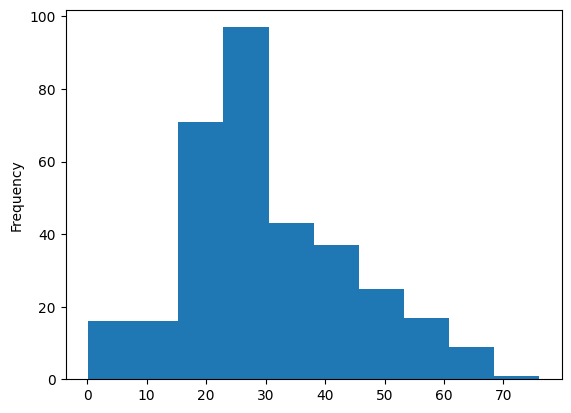

In [66]:
df_titanic["Age"].plot(kind="hist")

<Axes: xlabel='Age', ylabel='Fare'>

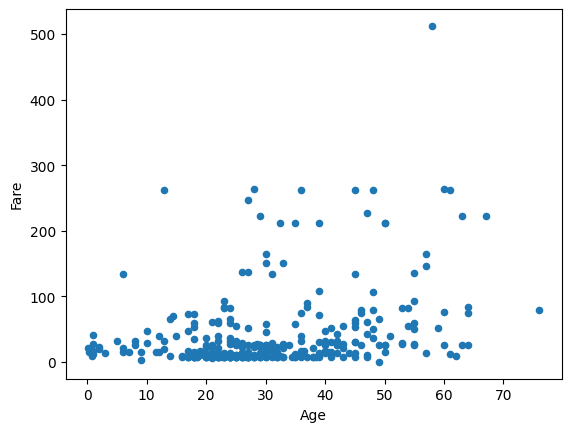

In [67]:
df_titanic.plot(kind="scatter", x="Age", y="Fare")

In [68]:
set(df_titanic["Sex"])

{'female', 'male'}

In [69]:
df_titanic["Sex_Num"] = [-1 if val == "male" else 1 for val in list(df_titanic["Sex"])]

<Axes: xlabel='Age', ylabel='Sex_Num'>

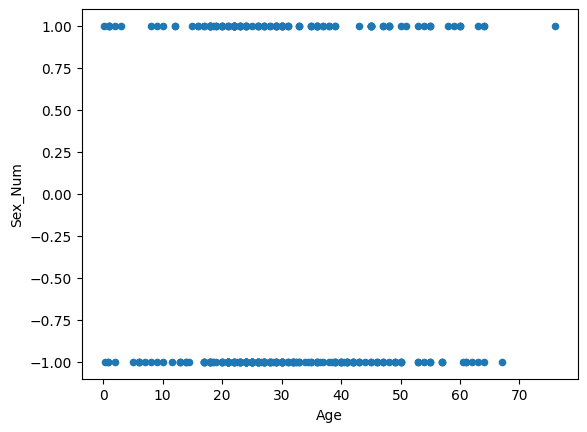

In [70]:
df_titanic.plot(kind="scatter", x="Age", y="Sex_Num")

<Axes: xlabel='Fare', ylabel='Sex_Num'>

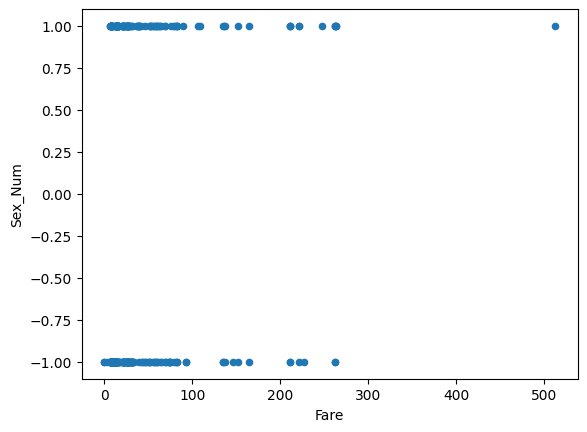

In [71]:
df_titanic.plot(kind="scatter", x="Fare", y="Sex_Num")

<Axes: >

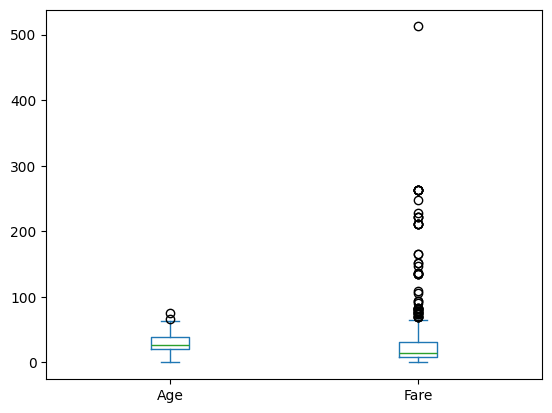

In [72]:
df_titanic[["Age", "Fare"]].plot(kind='box')

In [73]:
df_titanic[["Pclass", "Age", "SibSp", "Fare", "Sex_Num"]].corr()

,Pclass,Age,SibSp,Fare,Sex_Num
Pclass,1.000000,-0.492143,0.001087,-0.577147,-0.108615
Age,-0.492143,1.000000,-0.091587,0.337932,-0.000013
SibSp,0.001087,-0.091587,1.000000,0.171539,0.099943
Fare,-0.577147,0.337932,0.171539,1.000000,0.191514
Sex_Num,-0.108615,-0.000013,0.099943,0.191514,1.000000


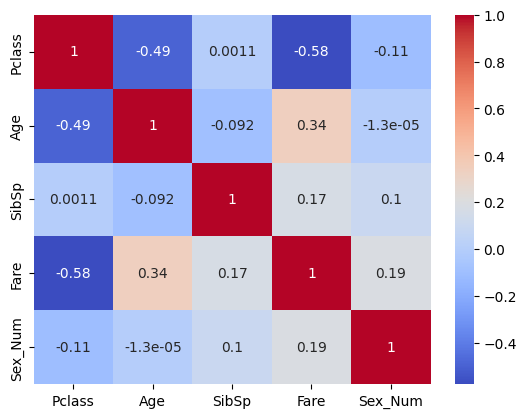

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(
    df_titanic[["Pclass", "Age", "SibSp", "Fare", "Sex_Num"]].corr(),
    annot=True, cmap='coolwarm',
)
plt.show()

In [75]:
df_titanic.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_Num
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,-1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,-1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,-1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


In [78]:
print(df_titanic.iloc[1])

PassengerId                                 893
Pclass                                        3
Name           Wilkes, Mrs. James (Ellen Needs)
Sex                                      female
Age                                        47.0
SibSp                                         1
Parch                                         0
Ticket                                   363272
Fare                                        7.0
Cabin                                       NaN
Embarked                                      S
Sex_Num                                       1
Name: 1, dtype: object
